In [4]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
from pathlib import Path
from pylab import rcParams
rcParams['figure.figsize'] = 14, 6
from scipy.io import wavfile
import torch
import noisereduce as nr
from IPython.display import Audio, display


In [9]:
sr = 16000
#freq_mask_smooth_hz: 주파수 마스크를 얼마나 부드럽게 할지 지정 (기본값은 500 Hz).freq_mask_smooth_hz를 증가시키면 주파수 영역에서 부드러운 전이 효과를 얻을 수 있음
#time_mask_smooth_ms: 시간 마스크를 얼마나 부드럽게 할지 지정 (기본값은 50 밀리초)
#hresh_n_mult_nonstationary은 높은 값을 설정하면 노이즈 제거가 강력하게 이루어집니다.

# load data
data, rate = librosa.load(
    'D:/008.소음 환경 음성인식 데이터/01.데이터/1.Training/원천데이터_0824_add/TS3_04.카페,음식점_01.대화소음/04.카페,음식점/01.대화소음/04_06_003238_210830_SN.wav',
    offset = 260,
    duration = 10
    )
# y1,sr = librosa.load('D:/008.소음 환경 음성인식 데이터/01.데이터/1.Training/원천데이터_0824_add/TS3_04.카페,음식점_01.대화소음/04.카페,음식점/01.대화소음/04_06_003238_210830_SN.wav', mono=True, sr=sr)
# perform noise reduction
reduced_noise = nr.reduce_noise(
    y=data, 
    sr=rate,
    )
audio_obj_ori = Audio(data, rate=rate)

# Audio scailing
volume_multiplier = 4.0
increased_volume = reduced_noise * volume_multiplier

# range check
print(np.min(increased_volume), np.max(increased_volume))

# display(audio_obj_ori) 오디오 잘 뽑아졌는지 확인.

# scaled volume check
rms_original = np.sqrt(np.mean(np.square(reduced_noise)))
rms_half_volume = np.sqrt(np.mean(np.square(increased_volume)))

db_reduction = 20 * np.log10(rms_half_volume / rms_original)
print("증가한 dB:", db_reduction)

# y1,sr = librosa.load(reduced_noise)

-1.0595484 0.799137


증가한 dB: 12.041200399398804


C:\Users\user\AppData\Local\Temp\ipykernel_3084\20424249.py:1: FutureWarning: waveshow() keyword argument 'x_axis' has been renamed to 'axis' in version 0.10.0.
	This alias will be removed in version 1.0.
  librosa.display.waveshow(increased_volume, sr=rate, x_axis='time', color='blue')
C:\Users\user\AppData\Local\Temp\ipykernel_3084\20424249.py:2: FutureWarning: waveshow() keyword argument 'x_axis' has been renamed to 'axis' in version 0.10.0.
	This alias will be removed in version 1.0.
  librosa.display.waveshow(reduced_noise, sr=rate, x_axis='time', color='yellow')


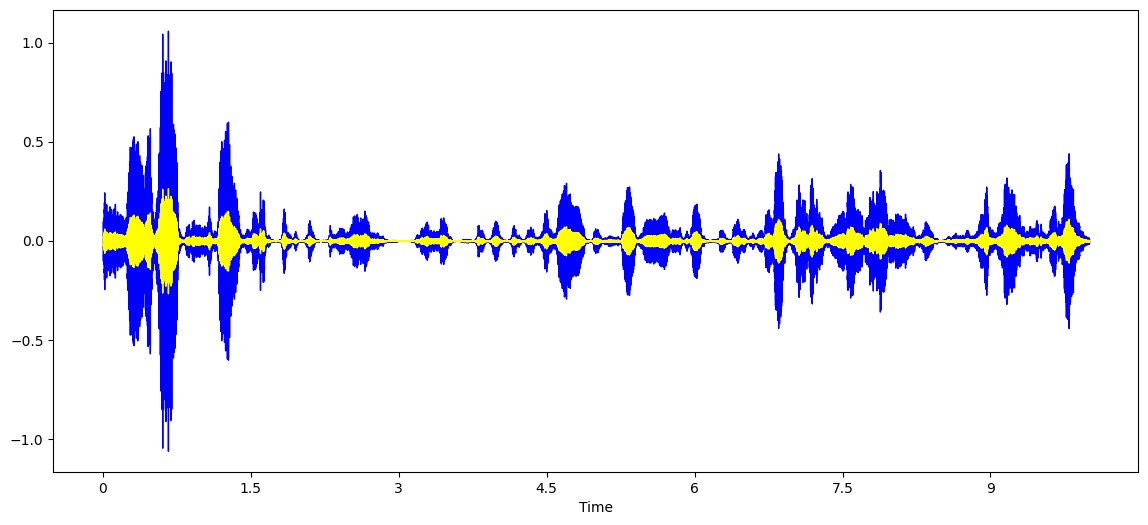

In [10]:
librosa.display.waveshow(increased_volume, sr=rate, x_axis='time', color='blue')
librosa.display.waveshow(reduced_noise, sr=rate, x_axis='time', color='yellow')

In [11]:
# reduced_noise를 Audio 객체로 만들어서 듣기
audio_obj = Audio(data=np.array(reduced_noise), rate=rate)
audio_obj_ori = Audio(data, rate=rate)
audio_obj_scaled = Audio(data=np.array(increased_volume), rate=rate)


# 생성한 Audio 객체를 표시
display(audio_obj_ori)
display(audio_obj)
display(audio_obj_scaled)

#wavfile.write("D:/008.소음 환경 음성인식 데이터/01.데이터/1.Training/원천데이터_0824_add/TS3_04.카페,음식점_01.대화소음/04.카페,음식점/original_audio.wav", rate, data)
wavfile.write("D:/008.소음 환경 음성인식 데이터/01.데이터/1.Training/원천데이터_0824_add/TS3_04.카페,음식점_01.대화소음/04.카페,음식점/noise_reduce_scaled_audio.wav", rate, increased_volume)